# Visualizing probability transformations

In [1]:
import os
import sys
import time
import random
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
from scipy.stats.kde import gaussian_kde

from utils.ops import onehot_encode, project_sequence_onsimplex, project_sequence, optim_temperature
from utils.metrics import neg_log_likelihood, expected_calibration_error
from utils.visualization import plot_pdf_simplex, plot_prob_simplex
from calibrators import MLRCalibrator

In [2]:
%matplotlib inline

## Generating fake target disitribution and simulated predictions 

In [3]:
n_samples = 500

In [4]:
target = np.array(random.choices(range(3), k=n_samples))
one_hot = onehot_encode(target)

## Some accurate predictions 

In [5]:
acc_logits = one_hot+np.random.randn(n_samples, 3)*0.5
acc_probs = softmax(acc_logits, axis=1)

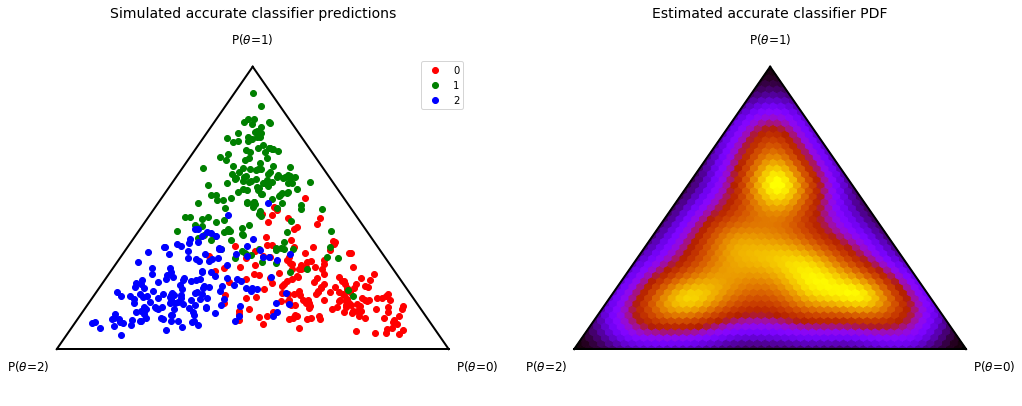

In [6]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_simplex(acc_probs, target=target, ax=ax_arr[0], title='Simulated accurate classifier predictions', fontsize=12);
ax_arr[1] = plot_pdf_simplex(acc_probs, ax=ax_arr[1], title='Estimated accurate classifier PDF', fontsize=12);
plt.show()

### Apply temperature scaling 

In [7]:
# Temp scaling
T = optim_temperature(acc_logits, target)
adj_acc_probs = softmax(acc_logits/T, axis=1)

nll_before = neg_log_likelihood(acc_probs, target)
ece_before = expected_calibration_error(acc_probs, target)
nll_after = neg_log_likelihood(adj_acc_probs, target)
ece_after = expected_calibration_error(adj_acc_probs, target)

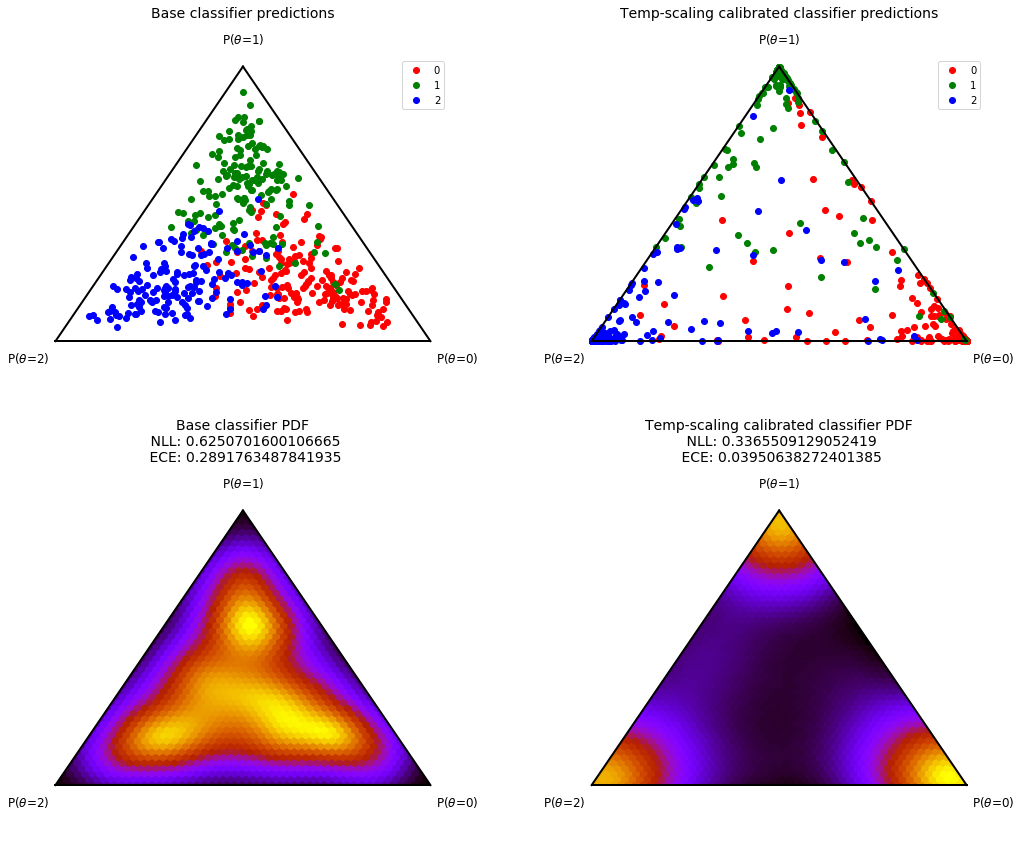

In [8]:
fig, ax_arr = plt.subplots(2, 2, figsize=(17, 14), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
ax_arr[0, 0] = plot_prob_simplex(acc_probs, target=target, ax=ax_arr[0, 0], title='Base classifier predictions', fontsize=12);
ax_arr[0, 1] = plot_prob_simplex(adj_acc_probs, target=target, ax=ax_arr[0, 1], 
                                 title='Temp-scaling calibrated classifier predictions', fontsize=12);
ax_arr[1, 0] = plot_pdf_simplex(acc_probs, ax=ax_arr[1, 0], 
                                title='Base classifier PDF\n NLL: {}\n ECE: {}'.format(nll_before, ece_before), fontsize=12);
ax_arr[1, 1] = plot_pdf_simplex(adj_acc_probs, ax=ax_arr[1, 1],
                                title='Temp-scaling calibrated classifier PDF\n NLL: {}\n ECE: {}'.format(nll_after, ece_after), fontsize=12);
plt.show()

## Twistted predictions

In [9]:
twisting = np.zeros((n_samples, 3))
twisting[np.arange(n_samples), target-1] = 0.7 + np.random.randn(n_samples)*0.2
twst_logits = 0.8 * (one_hot + twisting + np.random.randn(n_samples, 3)*0.3)
twst_probs = softmax(twst_logits, axis=1)

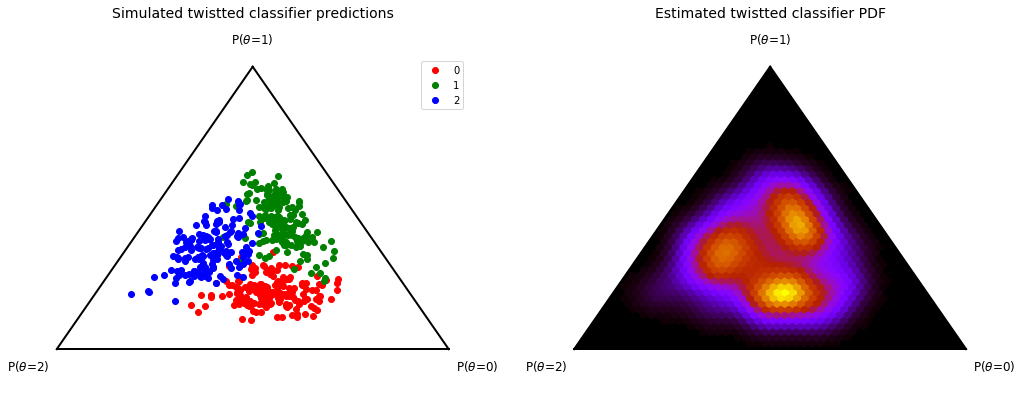

In [10]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_simplex(twst_probs, target=target, ax=ax_arr[0], title='Simulated twistted classifier predictions', fontsize=12);
ax_arr[1] = plot_pdf_simplex(twst_probs, ax=ax_arr[1], title='Estimated twistted classifier PDF', fontsize=12);
plt.show()

### Apply temperature scaling 

In [11]:
# Temp scaling
T = optim_temperature(twst_logits, target)
adj_twst_probs = softmax(twst_logits/T, axis=1)

nll_before = neg_log_likelihood(twst_probs, target)
ece_before = expected_calibration_error(twst_probs, target)
nll_after = neg_log_likelihood(adj_twst_probs, target)
ece_after = expected_calibration_error(adj_twst_probs, target)

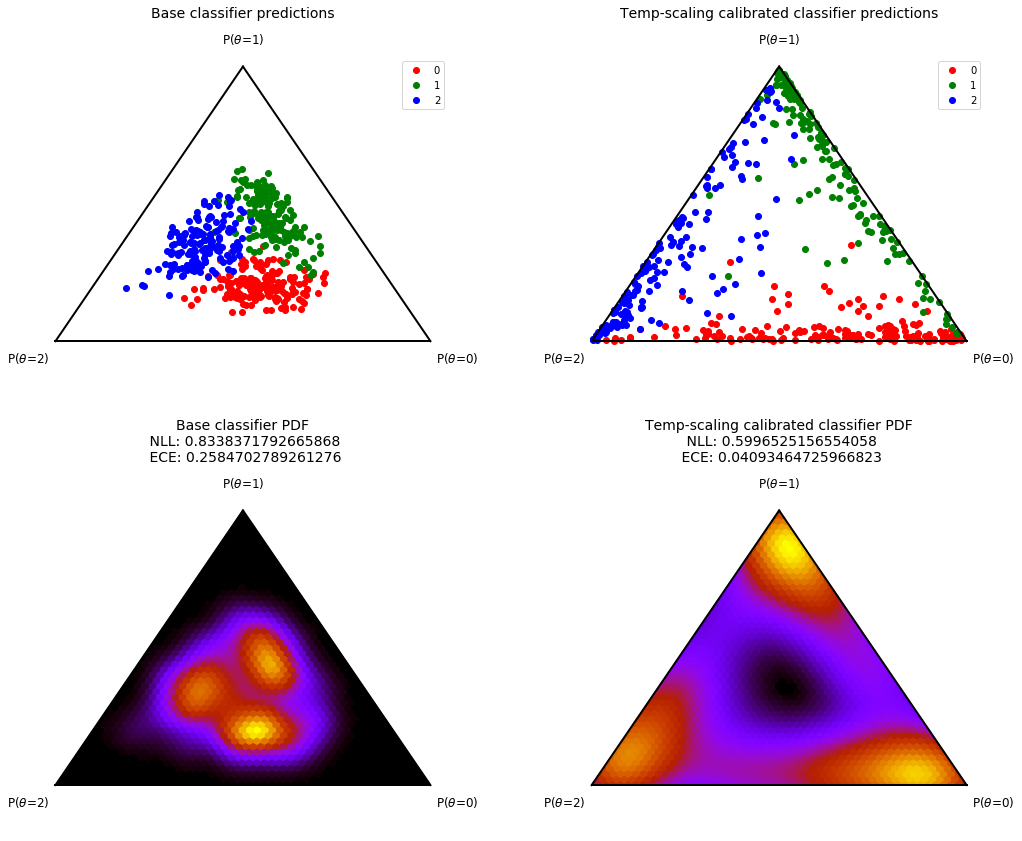

In [12]:
fig, ax_arr = plt.subplots(2, 2, figsize=(17, 14), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
ax_arr[0, 0] = plot_prob_simplex(twst_probs, target=target, ax=ax_arr[0, 0],
                                 title='Base classifier predictions', fontsize=12);
ax_arr[0, 1] = plot_prob_simplex(adj_twst_probs, target=target, ax=ax_arr[0, 1],
                                 title='Temp-scaling calibrated classifier predictions', fontsize=12);
ax_arr[1, 0] = plot_pdf_simplex(twst_probs, ax=ax_arr[1, 0],
                                title='Base classifier PDF\n NLL: {}\n ECE: {}'.format(nll_before, ece_before), fontsize=12);
ax_arr[1, 1] = plot_pdf_simplex(adj_twst_probs, ax=ax_arr[1, 1],
                                title='Temp-scaling calibrated classifier PDF\n NLL: {}\n ECE: {}'.format(nll_after, ece_after), fontsize=12);
plt.show()

## Shifted predictions 

In [13]:
offset = np.zeros((n_samples, 3))
offset[:, 1] = 0.5

shft_logits = one_hot + np.random.randn(n_samples, 3)*0.5 + offset
shft_probs = softmax(shft_logits, axis=1)

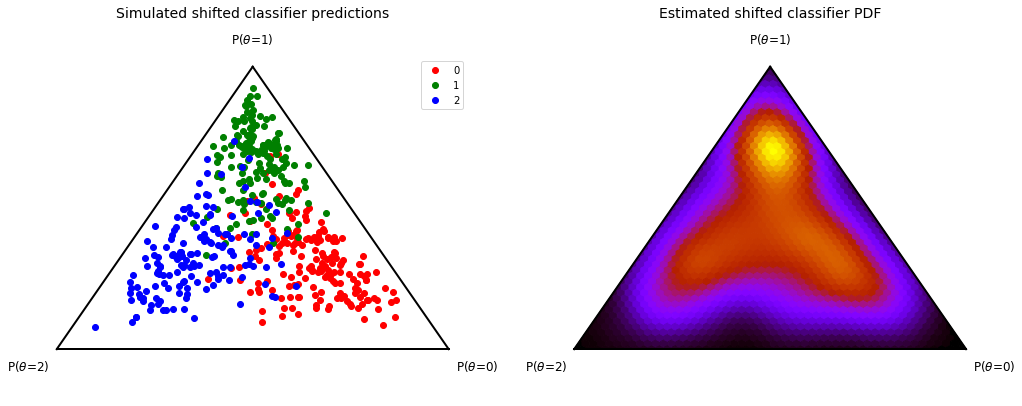

In [14]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_simplex(shft_probs, target=target, ax=ax_arr[0], title='Simulated shifted classifier predictions', fontsize=12);
ax_arr[1] = plot_pdf_simplex(shft_probs, ax=ax_arr[1], title='Estimated shifted classifier PDF', fontsize=12);
plt.show()

### Apply temp-scaling 

In [15]:
# Temp scaling
T = optim_temperature(shft_logits, target)
adj_shft_probs = softmax(shft_logits/T, axis=1)

nll_before = neg_log_likelihood(shft_probs, target)
ece_before = expected_calibration_error(shft_probs, target)
nll_after = neg_log_likelihood(adj_shft_probs, target)
ece_after = expected_calibration_error(adj_shft_probs, target)

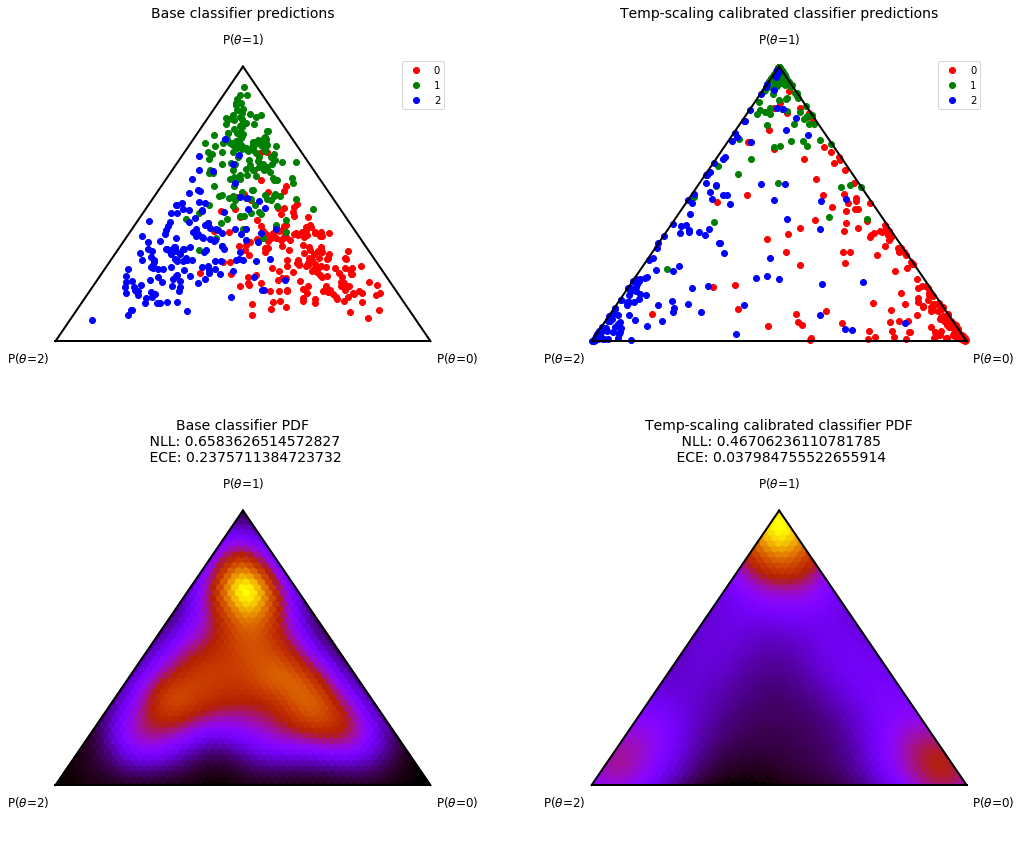

In [16]:
fig, ax_arr = plt.subplots(2, 2, figsize=(17, 14), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
ax_arr[0, 0] = plot_prob_simplex(shft_probs, target=target, ax=ax_arr[0, 0],
                                 title='Base classifier predictions', fontsize=12);
ax_arr[0, 1] = plot_prob_simplex(adj_shft_probs, target=target, ax=ax_arr[0, 1],
                                 title='Temp-scaling calibrated classifier predictions', fontsize=12);
ax_arr[1, 0] = plot_pdf_simplex(shft_probs, ax=ax_arr[1, 0],
                                title='Base classifier PDF\n NLL: {}\n ECE: {}'.format(nll_before, ece_before), fontsize=12);
ax_arr[1, 1] = plot_pdf_simplex(adj_shft_probs, ax=ax_arr[1, 1],
                                title='Temp-scaling calibrated classifier PDF\n NLL: {}\n ECE: {}'.format(nll_after, ece_after), fontsize=12);
plt.show()

## Shifted+Twistted predictions 

In [17]:
offset = np.zeros((n_samples, 3))
offset[:, 1:] = 0.4

twisting = np.zeros((n_samples, 3))
twisting[np.arange(n_samples), target-1] = 0.7 + np.random.randn(n_samples)*0.1

snt_logits = 0.8 * (one_hot + twisting + np.random.randn(n_samples, 3)*0.2) + offset
snt_probs = softmax(snt_logits, axis=1)

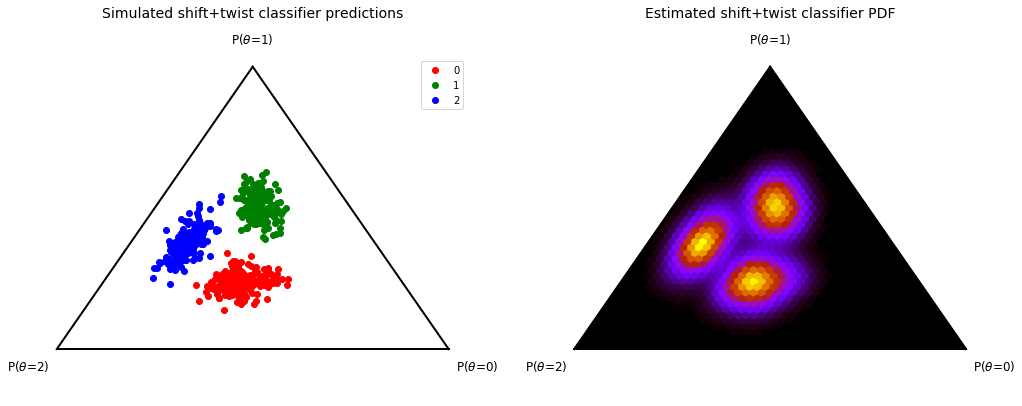

In [18]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_simplex(snt_probs, target=target, ax=ax_arr[0], title='Simulated shift+twist classifier predictions', fontsize=12);
ax_arr[1] = plot_pdf_simplex(snt_probs, ax=ax_arr[1], title='Estimated shift+twist classifier PDF', fontsize=12);
plt.show()

### Apply temp-scaling

In [19]:
# Temp scaling
T = optim_temperature(snt_logits, target)
adj_snt_probs = softmax(snt_logits/T, axis=1)

nll_before = neg_log_likelihood(snt_probs, target)
ece_before = expected_calibration_error(snt_probs, target)
nll_after = neg_log_likelihood(adj_snt_probs, target)
ece_after = expected_calibration_error(adj_snt_probs, target)

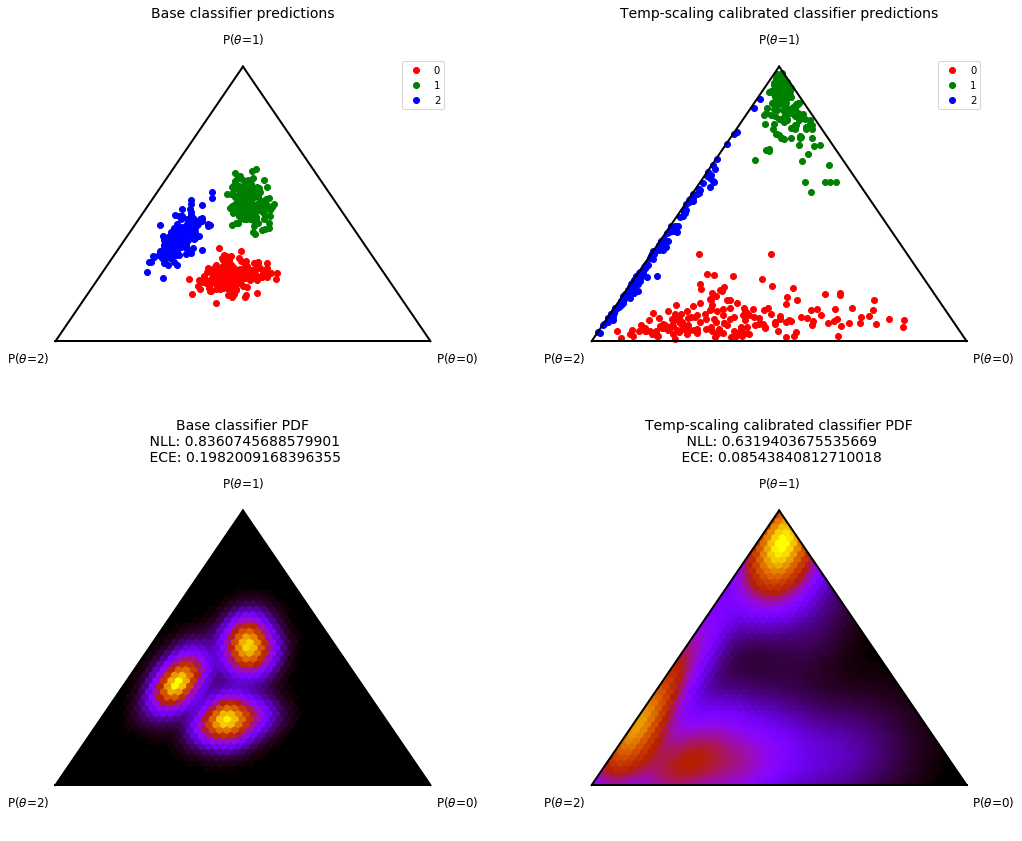

In [20]:
fig, ax_arr = plt.subplots(2, 2, figsize=(17, 14), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
ax_arr[0, 0] = plot_prob_simplex(snt_probs, target=target, ax=ax_arr[0, 0],
                                 title='Base classifier predictions', fontsize=12);
ax_arr[0, 1] = plot_prob_simplex(adj_snt_probs, target=target, ax=ax_arr[0, 1],
                                 title='Temp-scaling calibrated classifier predictions', fontsize=12);
ax_arr[1, 0] = plot_pdf_simplex(snt_probs, ax=ax_arr[1, 0],
                                title='Base classifier PDF\n NLL: {}\n ECE: {}'.format(nll_before, ece_before), fontsize=12);
ax_arr[1, 1] = plot_pdf_simplex(adj_snt_probs, ax=ax_arr[1, 1],
                                title='Temp-scaling calibrated classifier PDF\n NLL: {}\n ECE: {}'.format(nll_after, ece_after), fontsize=12);
plt.show()

### Apply MLR Calibrator

In [21]:
mlr_cal = MLRCalibrator(snt_logits, target)

mlr_snt_probs = mlr_cal.predict(snt_logits)

nll_before = neg_log_likelihood(snt_probs, target)
ece_before = expected_calibration_error(snt_probs, target)
nll_after = neg_log_likelihood(mlr_snt_probs, target)
ece_after = expected_calibration_error(mlr_snt_probs, target)

[-0.19192998 -0.13084693 -0.03704846 -0.02403459]
[-0.17511373 -0.1223365  -0.03109767 -0.02167957]
[-0.1201479  -0.0906721  -0.01281721 -0.01665859]
[-0.0314124  -0.01437598  0.009266   -0.02630242]
[-0.03045973 -0.01485245  0.00668108 -0.02228836]
[-0.02685913 -0.01685241 -0.00335296 -0.00665376]
[-0.01552005 -0.0260449  -0.03848079  0.04900563]
[-0.01460218 -0.02516392 -0.03890543  0.04946717]
[-0.0113802  -0.02187892 -0.04054368  0.0510424 ]
[-0.00348081 -0.01163713 -0.04618481  0.05434113]
[-0.00364428 -0.01018137 -0.04131324  0.04785033]
[-0.00470367 -0.00482422 -0.02115017  0.02127072]
[-0.01559242  0.00920599  0.06806014 -0.09285855]
[-0.00622512 -0.0006318  -0.00205286 -0.00354046]
[-0.0060398  -0.00086182 -0.0017887  -0.00338929]
[-0.00530313 -0.00177966 -0.00073872 -0.00278475]
[-0.00242856 -0.00541503  0.00335546 -0.00036898]
[-0.00250409 -0.00523326  0.00302906 -0.00029989]
[-2.80801069e-03 -4.50736921e-03  1.72541915e-03 -2.60606264e-05]
[-0.00405135 -0.00162312 -0.003457

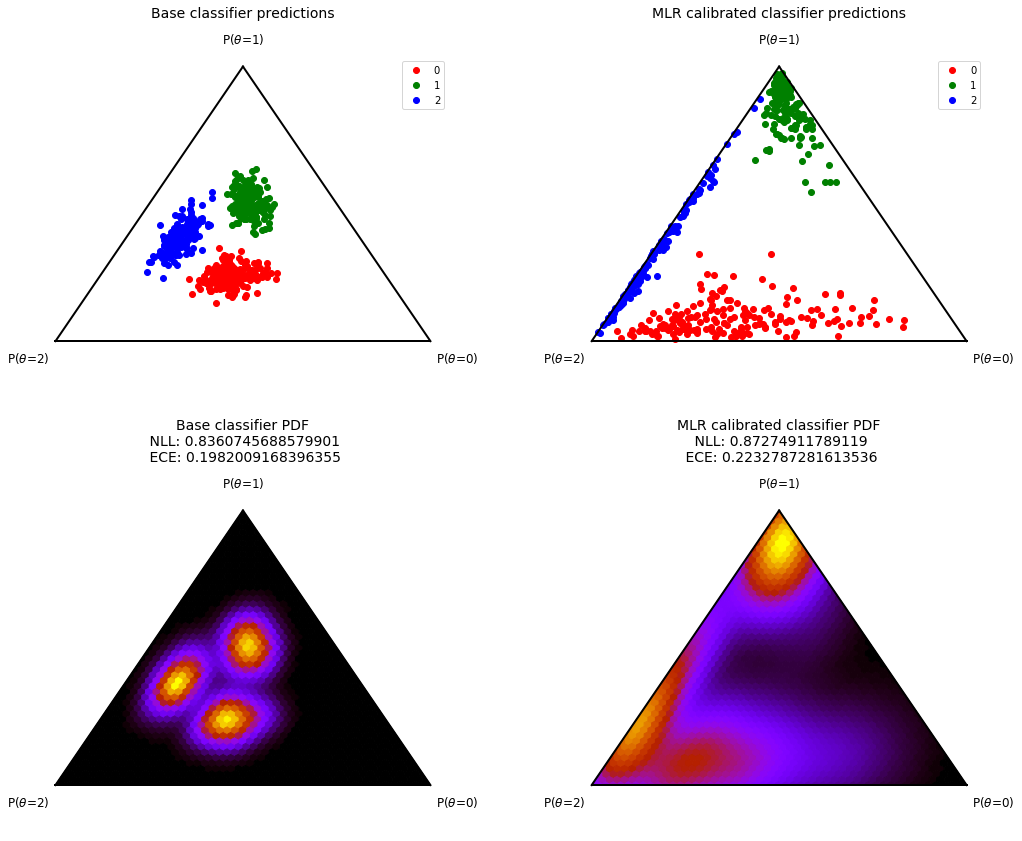

In [22]:
fig, ax_arr = plt.subplots(2, 2, figsize=(17, 14), gridspec_kw={'hspace': 0.4, 'wspace': 0.3})
ax_arr[0, 0] = plot_prob_simplex(snt_probs, target=target, ax=ax_arr[0, 0],
                                 title='Base classifier predictions', fontsize=12);
ax_arr[0, 1] = plot_prob_simplex(adj_snt_probs, target=target, ax=ax_arr[0, 1],
                                 title='MLR calibrated classifier predictions', fontsize=12);
ax_arr[1, 0] = plot_pdf_simplex(snt_probs, ax=ax_arr[1, 0],
                                title='Base classifier PDF\n NLL: {}\n ECE: {}'.format(nll_before, ece_before), fontsize=12);
ax_arr[1, 1] = plot_pdf_simplex(adj_snt_probs, ax=ax_arr[1, 1],
                                title='MLR calibrated classifier PDF\n NLL: {}\n ECE: {}'.format(nll_after, ece_after), fontsize=12);
plt.show()